In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import numpy as np

In [4]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
labels = dataset.iloc[:, 0].values
dataset = pd.read_csv('test.csv')
X_test = dataset.iloc[:, 1:].values
y_test = dataset.iloc[:, 0].values

In [13]:
idx = np.random.randint(0, X.shape[0], 8)
print(idx)

[15466 28935 96231 47043 14461 93929 36123 43382]


In [5]:
print (X[0].shape)

(784,)


In [3]:
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X, y)

In [99]:
import pickle
classifier = pickle.load(open('classifier.pkl', 'rb'))

In [167]:
def get_rect_list(contours):
    rect_list = []
    temp = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        temp.append([x, 1 / h, y, w, h])

    temp.sort()
    last = -1
    for rect in temp:
        if rect[0] + rect[3] >= last and rect[-1] * rect[-2] >= 1000:
            last = rect[0] + rect[3]
            rect_list.append([rect[0], rect[2], rect[3], rect[4]])
    return rect_list

In [168]:
def normalize(img):

    diff = len(img[0]) - 28
    if diff == 0:
        # print(img)
        return img
    
    if diff > 0:

        right = (diff + 1) // 2
        left = (diff) // 2
        
        np.delete(img, np.s_[len(img[0]) - right : len(img[0])], axis = 1)
        np.delete(img, np.s_[0 : left], axis=1)
        return img

    diff *= -1

    left_zeros = np.zeros((28 , diff // 2), dtype=img.dtype)
    right_zeros = np.zeros((28, (diff + 1) // 2), dtype=img.dtype)

    img = np.concatenate((left_zeros, img, right_zeros), axis=1)
        
    # print (img)
    return img 

In [169]:
def flat(img):
    temp = []
    for i in range(28):
        for j in range(28):
            temp.append(img[j][i])
    
    return temp

In [170]:
table = {
0: 48,
1: 49,
2: 50,
3: 51,
4: 52,
5: 53,
6: 54,
7: 55,
8: 56,
9: 57,
10: 65,
11: 66,
12: 67,
13: 68,
14: 69,
15: 70,
16: 71,
17: 72,
18: 73,
19: 74,
20: 75,
21: 76,
22: 77,
23: 78,
24: 79,
25: 80,
26: 81,
27: 82,
28: 83,
29: 84,
30: 85,
31: 86,
32: 87,
33: 88,
34: 89,
35: 90,
36: 97,
37: 98,
38: 100,
39: 101,
40: 102,
41: 103,
42: 104,
43: 110,
44: 113,
45: 114,
46: 116
}

In [171]:
img_read = cv2.imread("char.jpg", cv2.IMREAD_GRAYSCALE)
img_gas = cv2.GaussianBlur (img_read, (3, 3), 3)
img_thresh2 = cv2.adaptiveThreshold(img_gas, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 181, 10)
img_thresh2 = ~img_thresh2


cv2.imshow("sfsdf",img_thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()


contours, hierarchy = cv2.findContours(img_thresh2,
  cv2.RETR_TREE,
  cv2.CHAIN_APPROX_SIMPLE)

rect_list = get_rect_list (contours)

for rect in rect_list:
  x = rect[0]
  y = rect[1]
  w = rect[2]
  h = rect[3]
  cv2.rectangle(img_read ,(x,y), (x+w,y+h), (255,0,0), 5)
  cv2.imshow("img_read", img_read)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  # cv2.rectangle(img_thresh2 ,(x,y), (x+w,y+h), (255,255,255), 5)

all = []
shit = []
final_pic=''
for rect in rect_list:
  x = rect[0]
  y = rect[1]
  w = rect[2]
  h = rect[3]
  roi = img_thresh2[y : y + h, x : x + w]
  
  desired_height = 28
  aspect_ratio = desired_height / roi.shape[0]
  desired_width = int(roi.shape[1] * aspect_ratio)
  dim = ( desired_width, desired_height) 

  
  resized_cropped_region = cv2.resize(roi, dsize=dim, interpolation=cv2.INTER_AREA)
  normal_pic = normalize (resized_cropped_region)
  temp = flat(normal_pic)
  # cv2.imshow("img_read", normal_pic)
  # cv2.waitKey (0)
  # cv2.destroyAllWindows()
  final_pic = np.array(temp)
  shit.append (temp)
  all.append(final_pic)
# shit = all
# all = np.array(all)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [172]:
X = X.reshape(-1, 28, 28)
for i in range (112799):
    X[i] = np.transpose(X[i], axes=None)

In [173]:
X = X/255
X = X.reshape(-1, 28, 28, 1)
X_test = X_test/255
X_test = X_test.reshape(-1, 28, 28, 1)

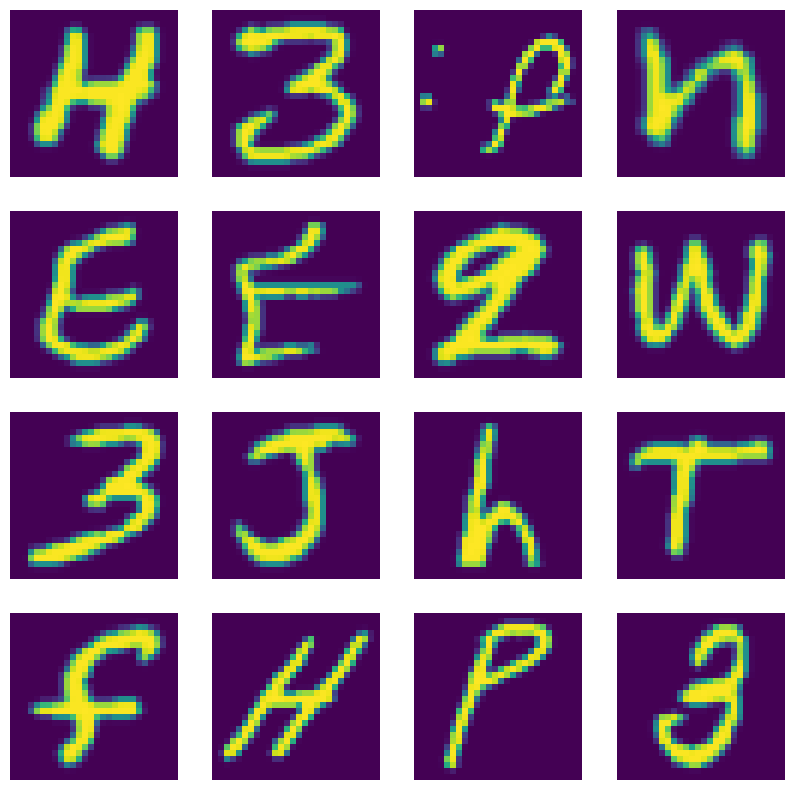

In [174]:
# X = X.reshape(-1, 28, 28, 1)
plt.figure(figsize=(10,10))
for i in range (16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(X[i + 16])
plt.show()

In [175]:
input_shape = X[0].shape

In [195]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer


generator = keras.preprocessing.image.ImageDataGenerator(

    rotation_range=10, 
    width_shift_range=0.10,
    height_shift_range=0.10,
    
)

In [196]:
model = keras.Sequential([

    # InputLayer(input_shape=input_shape),
        

    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape), 
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D((2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    # Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)), 

    Flatten(), 
    Dropout(0.5),

    # BatchNormalization(renorm=True),
    Dense(units=512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(units=512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(units=256,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=47, activation='softmax'),

])

In [132]:
print(X.shape)

(112799, 28, 28, 1)


In [53]:
X = X.reshape(-1, 28, 28)

In [197]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [136]:
print (Y)

[36 43 15 ... 23 31  8]


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, Y, stratify=Y, train_size=0.75)

In [198]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    generator.flow(X_train,y_train),
    validation_data=generator.flow(X_valid,y_valid),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping],
    # verbose=0
)

Epoch 1/20
2644/2644 [==============================] - 285s 107ms/step - loss: 1.4998 - accuracy: 0.5547 - val_loss: 0.5835 - val_accuracy: 0.7955
Epoch 2/20
2644/2644 [==============================] - 351s 133ms/step - loss: 0.8062 - accuracy: 0.7331 - val_loss: 0.4779 - val_accuracy: 0.8360
Epoch 3/20
2644/2644 [==============================] - 423s 160ms/step - loss: 0.6956 - accuracy: 0.7633 - val_loss: 0.4435 - val_accuracy: 0.8431
Epoch 4/20
2644/2644 [==============================] - 1917s 725ms/step - loss: 0.6317 - accuracy: 0.7852 - val_loss: 0.4239 - val_accuracy: 0.8503
Epoch 5/20
2644/2644 [==============================] - 216s 82ms/step - loss: 0.5880 - accuracy: 0.7964 - val_loss: 0.3933 - val_accuracy: 0.8563
Epoch 6/20
2644/2644 [==============================] - 209s 79ms/step - loss: 0.5666 - accuracy: 0.8047 - val_loss: 0.3710 - val_accuracy: 0.8667
Epoch 7/20
2644/2644 [==============================] - 305s 115ms/step - loss: 0.5426 - accuracy: 0.8119 - val_l

<Axes: title={'center': 'Accuracy'}>

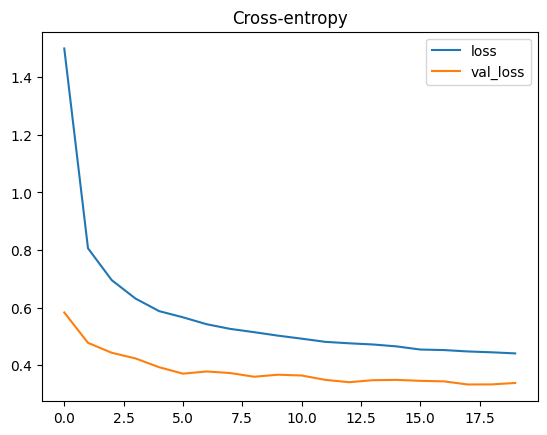

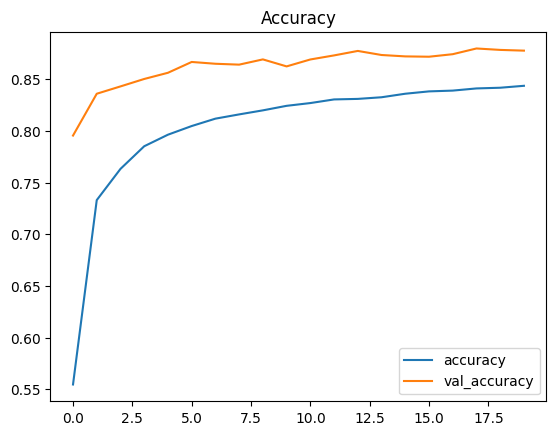

In [199]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [211]:
y_pred = model.predict(X_test)

: 

In [202]:
def maxin (lis):

    maxim = -1
    ind = -1
    for i in range(len(lis)):
        if maxim == -1 or lis[i] > maxim:
            maxim = lis[i]
            ind = i
    return ind

In [203]:
from sklearn.metrics import accuracy_score

temp = []
for i in y_pred:
    temp.append(maxin(i))
    
ok = 0; ct = 0
for i in range(len(temp)):
    if y_test[i] != temp[i]:
        ct += 1
        print(chr(table[y_test[i]]), chr(table[temp[i]]), end = " ")
        print()
    else :
        ok += 1
# print (ok, ct , end = " ")
ac = accuracy_score(y_test, temp)
print(ac)

e Q 
9 a 
q a 
E M 
B d 
3 W 
C r 
G Q 
7 V 
2 Y 
G Q 
G Q 
R a 
6 N 
q O 
S N 
T V 
8 a 
4 2 
Z n 
e g 
f N 
e Q 
b O 
G N 
C 9 
L 7 
S N 
f H 
n Z 
C a 
K F 
C 0 
b a 
b D 
q Q 
N S 
3 W 
5 N 
n C 
P G 
1 C 
E M 
6 Q 
V 2 
q a 
L T 
H f 
q a 
S N 
Z n 
e Q 
2 Q 
3 W 
q a 
a Q 
d D 
S O 
J H 
e 9 
N 9 
f M 
3 W 
Z n 
r t 
H I 
S N 
C 9 
W 3 
V 7 
B Q 
D 0 
f H 
T Y 
G Q 
W 3 
D O 
1 C 
C Q 
q a 
5 P 
h X 
N 5 
d a 
9 Y 
B Q 
B W 
B Q 
A 6 
A a 
r C 
4 2 
U 2 
R G 
b D 
4 Y 
P 6 
8 P 
8 R 
0 Q 
Y 2 
3 W 
d D 
A 4 
L I 
d g 
K X 
e 0 
P 8 
U 2 
T K 
B q 
d D 
5 P 
F H 
D 0 
A Q 
C Q 
5 P 
P G 
6 a 
a q 
O 0 
C n 
J P 
9 a 
C 7 
A E 
P 0 
9 q 
E M 
N 5 
K X 
f H 
W 3 
Z W 
5 N 
M E 
4 2 
K X 
U J 
L I 
S N 
2 n 
6 D 
A 6 
S N 
P 0 
T r 
1 I 
E M 
9 a 
K b 
D G 
4 Z 
3 W 
F H 
K X 
T Y 
L 7 
O D 
d e 
L 1 
H I 
M E 
D 0 
3 W 
0 O 
5 P 
t h 
6 D 
A E 
G Q 
P 0 
B Q 
f d 
A 4 
S N 
S N 
X t 
I O 
P G 
H I 
T r 
K Z 
6 P 
d g 
5 N 
d g 
4 2 
n C 
h Z 
C n 
5 N 
A E 
h Z 
L 7 
6 D 
e 0 
A 6 


In [60]:
all = np.array(all)
all = all/255
all = all.reshape(-1, 28, 28, 1)

In [210]:
y_pred = model.predict(all)
# print(y_pred)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type builtin_function_or_method).

In [206]:
X_test = X_test.reshape(-1, 28, 28)
for i in range (len(X_test)):
    X_test[i] = np.transpose(X_test[i], axes=None)

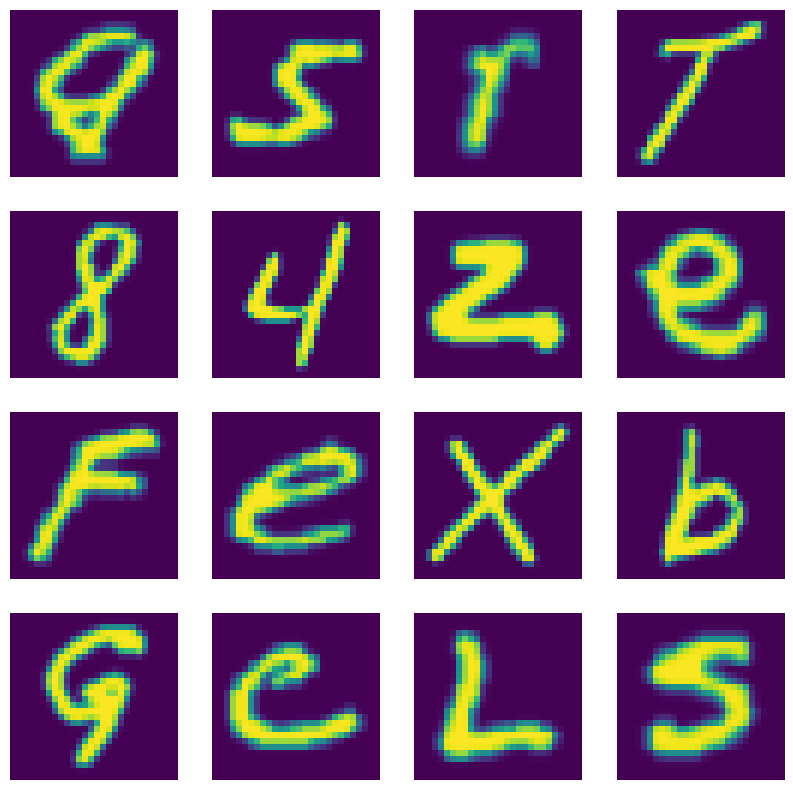

In [208]:
plt.figure(figsize=(10,10))
for i in range (16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(X_test[i + 16])
plt.show()

In [22]:
import pickle
pickle.dump(model, open('shit.pkl', 'wb'))

In [20]:
for i in y_pred:
    print (chr(table[maxin(i)]), end="")

ASAD